### 거스름돈

In [6]:
M = [500,100,50,10,5,1]
pay = 1000 - int(input())
i,cnt = 0,0
while pay>0:
    cnt = int(pay/M[i]) + cnt
    pay = pay%M[i]
    i+=1
print(cnt)

380
4


In [7]:
M = [500,100,50,10,5,1]

pay = 1000 - int(input())
coin = 0

for i in M:
    coin += pay //i
    pay %=i
print(coin)


380
4


### 4564 숫자 카드 놀이

In [13]:
Num = []
while True:
    num = int(input())
    if num ==0:
        break
    Num.append(num)
    
Result = [[] for _ in range(len(Num))]
for index in range(len(Num)):
    num = Num[index]
    Result[index].append(num)
    while num >=10:
        S,c = list(str(num)),1
        for i in S:
            c*=int(i)
        num = c
        Result[index].append(num)
for lists in Result:
    for element in lists:
        print(element, end=' ')
    print()

95
396
28
4
40
0
95 45 20 0 
396 162 12 2 
28 16 6 
4 
40 0 


### 1931 회의실 배정

#### 내코드 - 안되는 이유: 중복을 해결하지 않음

In [12]:
N = int(input())
Case,Max = [],0
check = []

for _ in range(N):
    s,e = list(map(int,input().split()))
    if e>Max:
        Max = e
    Case.append((s,e,e-s))
Case = sorted(Case, key=lambda data:data[2])

check,count = [False] * (Max+1),0


for cs in Case:
    C = True
    for i in range(cs[0],cs[1]):
        if check[i]:
            C = False
            break
    if C == True:
        for i in range(cs[0],cs[1]):
            check[i] = True
        count+=1
print(count)

11
1 4
3 5
0 6
5 7
3 8
5 9
6 10
8 11
8 12
2 13
12 14
4


In [ ]:
N = int(input()) 
time = [[0]*2 for _ in range(N)] 
for i in range(N):
    s, e = map(int, input().split()) 
    time[i][0] = s 
    time[i][1] = e 
time.sort(key = lambda x: (x[1], x[0])) 
## 제일 먼저 끝나는 순서로 정렬

cnt = 1 
end_time = time[0][1] 
## 몇시에 시작하는것 상관 없이 가장 먼저 끝나는것 
## 다음으로 먼저 끝나는것 갯수 합산
for i in range(1, N): 
    if time[i][0] >= end_time: 
        cnt += 1 
        end_time = time[i][1] 
print(cnt)

### B2217 로프

#### w/n 개소리해서 무슨 말인가 헷갈렸는데 정리하자면
> [10,6,1] 존재
- 10을 올리면 [6,1]은 10을 못견딘다
- 6을 올리면 [10,6]이 견디므로 12가 최대 중량
- 1을 올리면 [10,6,1] 모두 견디지만 3이 최대 중량

In [8]:
N = int(input())
Rope,result = [],[]

for _ in range(N):
    weight = int(input())
    Rope.append(weight)
Rope.sort(reverse = True)

for i in range(len(Rope)):
    max_w  = Rope[i] * (i+1)
    result.append(max_w)
print(max(result))
    

3
10
6
1
12


### B10310 30배수 만들기

#### N이 10^^5승
> 처음엔 조합을 통해 30으로 차례로 나눠가면서 Max를 찾으려 했음
- 조합만들기가 더 어려움;
- 조합으로 해도 시간복잡도 최대 120아닌가..? 문제 안될거 같은데

> 그냥 3의 배수는 각 자리수 합하면 3의 배수란걸 일단 사용;
- 그 정보를 활용해 큰 수 기준 내림차순 정렬
- 하지만 조합만들기도 포기하지 않을것...

In [14]:
N = input()

if '0' not in N:
    print(-1)
else:
    sum_n = 0
    for i in N:
        sum_n += int(i)
    if sum_n % 3 !=0:
        print(-1)
    else:
        for i in sorted(N, reverse = True):
            print(i,end = '')

102
210

### B1541 잃어버린 괄호

#### '-' 문자를 기준으로 문자열을 나눠 계산
> eval()함수 시도
- '012'는 eval()함수에서 사용할 수 없어서 Runtime Error

> '+'문자를 기준으로 한번 더 문자열을 나눴음

In [12]:
a = input()
a = a.split('-')
result,n= [],0
for i in a:
    num=0
    ex = i.split('+')
    for j in ex:
        num += int(j)
    result.append(num)
n = result[0]
for i in range(1,len(result)):
    n-=result[i]
print(n)    

55-50+40
-35


### B2875 대회 or 인턴

#### 내코드 - 틀림 why?

In [22]:
N,M,K = map(int,input().split())
M2, spare, teams = M*2,0,0

if N>=M2:
    spare = N-M2
    teams = M
else:
    spare = (M2-N)//2
    teams = M-spare
    
while K>spare:
    teams-=1
    spare+=3
print(teams)

3 6 5
1


In [24]:
N,M,K = map(int,input().split())

while K:
    if N>=2*M:
        N-=1
    else:
        M-=1
    K-=1
print(min(N//2,M))

6 3 2
2


### B1120 문자열
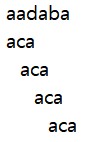
> 다음과 같은 사고방식으로 해결했다.
- diff+1번 반복해야함
- 저 중 가장 작은 값이 정답 (어차피 답 앞뒤로 넣으면 되니깐)

In [22]:
A,B = list(map(str,input().split()))
A,B,temp = list(A), list(B), []

diff = len(B) - len(A)

for i in range(0,diff+1):
    check = 0
    for j in range(0,len(A)):
        if B[j+i] != A[j]:
            check+=1
    temp.append(check)

print(min(temp))

aca aadaba
1


### B1049 기타줄
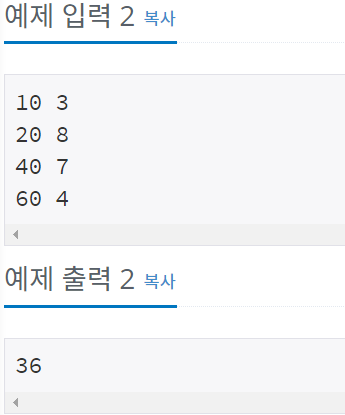
> 갯수 N개 브랜드 M개
- 패키지(가격)  개별(가격)

In [32]:
import sys

N,M = map(int,input().split())
brand = []
for _ in range(M):
    a,b = map(int,input().split())
    brand.append((a,b))
    
sort_P = sorted(brand, key=lambda x:x[0])
sort_U = sorted(brand, key=lambda x:x[1])

pack = sort_P[0][0]
unit = sort_U[0][1]

if unit*6 < pack:
    print(unit*N)
    sys.exit()

ps,us = N//6,N%6
pvalue, uvalue = ps*pack, us*unit

if pack < uvalue:
    print((ps+1)*pack)
else:
    print(pvalue+uvalue)

15 1
100 40
300
